In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df=pd.read_csv('Fish.csv')
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
133,Pike,345.0,36.0,38.5,41.0,6.3960,3.9770
104,Perch,265.0,25.4,27.5,28.9,7.0516,4.3350
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
94,Perch,150.0,21.0,23.0,24.5,5.2185,3.6260
111,Perch,840.0,32.5,35.0,37.3,11.4884,7.7957
24,Bream,700.0,31.9,35.0,40.5,16.2405,5.5890
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
86,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075
25,Bream,725.0,31.8,35.0,40.9,16.3600,6.0532


In [68]:
df.shape

(159, 7)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [70]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [71]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [72]:
sp = df['Species'].value_counts()
sp

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [73]:
y=df['Weight']
x=df.iloc[:,2:7]

In [74]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=0)

In [75]:
print('x_train: ', np.shape(x_train))
print('y_train: ', np.shape(y_train))
print('x_test: ', np.shape(x_test))
print('y_test: ', np.shape(y_test))

x_train:  (111, 5)
y_train:  (111,)
x_test:  (48, 5)
y_test:  (48,)


In [76]:
from sklearn.linear_model import LinearRegression as LR
reg=LR()

In [77]:
reg.fit(x_train,y_train)

LinearRegression()

In [78]:
m=reg.coef_
c=reg.intercept_
print("m =", m)
print("c =", c)

m = [117.43117364 -56.47164509 -38.73875714  35.62612911  48.26335647]
c = -405.9277613501245


In [79]:
y_head = reg.predict(x_train)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_train, y_head)

0.9014261773086572

In [81]:
y_pred = reg.predict(x_test)

In [82]:
print(r2_score(y_test, y_pred))

0.8136987517934342


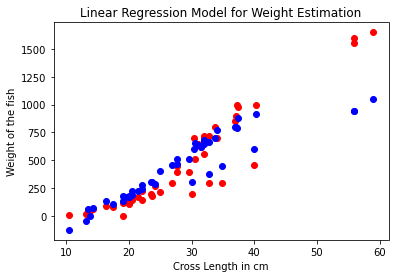

In [85]:
plt.scatter(x_test['Length1'], y_test, color='red')
plt.scatter(x_test['Length1'], y_pred, color='blue')
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

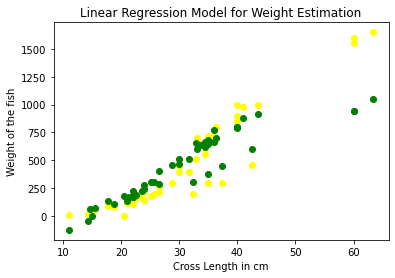

In [87]:
plt.scatter(x_test['Length2'], y_test, color='yellow')
plt.scatter(x_test['Length2'], y_pred, color='green')
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

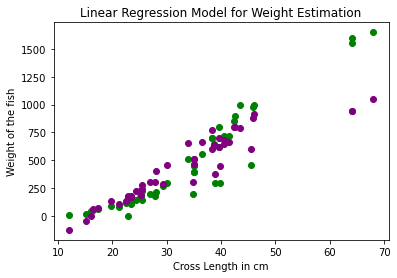

In [88]:
plt.scatter(x_test['Length3'], y_test, color='green')
plt.scatter(x_test['Length3'], y_pred, color='purple')
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

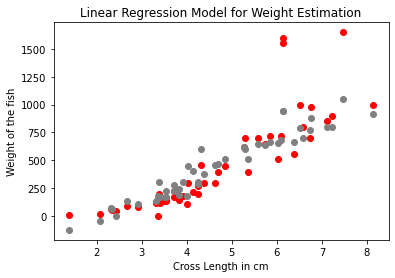

In [91]:
plt.scatter(x_test['Width'], y_test, color='red')
plt.scatter(x_test['Width'], y_pred, color='grey')
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

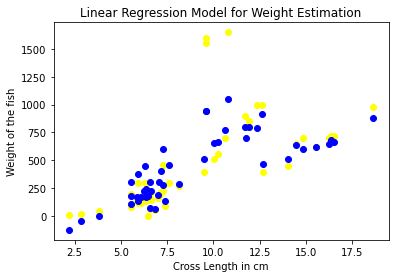

In [93]:
plt.scatter(x_test['Height'], y_test, color='yellow')
plt.scatter(x_test['Height'], y_pred, color='blue')
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

In [95]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_pred1.head()

,Estimated Weight
0,462.904976
1,176.797928
2,226.624847
3,185.662045
4,663.314987


In [96]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,390.0
1,0.0
2,170.0
3,160.0
4,556.0


In [97]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,Weight,Estimated Weight
0,390.0,462.904976
1,0.0,176.797928
2,170.0,226.624847
3,160.0,185.662045
4,556.0,663.314987
5,900.0,800.359927
6,800.0,698.150156
7,300.0,450.522576
8,975.0,882.106243
9,115.0,138.186626
